In [1]:
# Initial Imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [2]:
#df = pd.read_csv(
   # Path("WEOApr2021all.csv"), parse_dates=True
#)

#df = pd.read_csv(
    #Path("GDP.csv"),
    #index_col="DATE",
    #infer_datetime_format=True,
   # parse_dates=True,
#)
#df.tail()
#set date as index 
#create lagged column for next quarters gdp


df = pd.read_csv(
    Path("WEOApr2021all.csv")
)

df = df[(df["Subject Descriptor"]=="Gross domestic product, current prices") & (df["Units"]=="U.S. dollars")]
df.drop(columns=["Subject Descriptor", "Units", "Scale", "Estimates Start After"], inplace=True)
df = df.T
df.columns = df.loc["Country"]
df = df.drop("Country", axis=0)
df.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
WEO Country Code,512,914,612,614,311,213,911,314,193,122,...,111,298,927,846,299,582,487,474,754,698
ISO,AFG,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,...,USA,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
WEO Subject Code,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,...,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD
Subject Notes,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...
Country/Series-specific Notes,"See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...",...,"See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren..."


In [6]:
India_df = df[['India']]

India_gdp = India_df.drop(labels=["WEO Country Code", "ISO", "WEO Subject Code", "Subject Notes", "Country/Series-specific Notes"], axis=0)

India_gdp.rename(columns = {'Country':'Year'}, inplace = True)

#df = df.replace(",","", regex=True)
#df = df.astype("float")
#df


India_gdp = India_gdp.replace(",","", regex=True)
India_gdp = India_gdp.astype("float")
India_gdp

Country,India
1980,189.438
1981,196.535
1982,203.537
1983,222.049
1984,215.556
1985,237.618
1986,252.751
1987,283.750
1988,299.645
1989,301.234


In [7]:
def window_data(India_gdp, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(India_gdp) - window):
        features = India_gdp.iloc[i : (i + window), feature_col_number]
        target = India_gdp.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [8]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 20

feature_column = 0
target_column = 0
X, y = window_data(India_gdp, window_size, feature_column, target_column)
print (f"X sample values:\n{X} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[ 189.438  196.535  203.537  222.049  215.556  237.618  252.751  283.75
   299.645  301.234  326.608  274.842  293.262  284.194  333.014  366.6
   399.791  423.189  428.767  466.841]
 [ 196.535  203.537  222.049  215.556  237.618  252.751  283.75   299.645
   301.234  326.608  274.842  293.262  284.194  333.014  366.6    399.791
   423.189  428.767  466.841  476.636]
 [ 203.537  222.049  215.556  237.618  252.751  283.75   299.645  301.234
   326.608  274.842  293.262  284.194  333.014  366.6    399.791  423.189
   428.767  466.841  476.636  493.934]
 [ 222.049  215.556  237.618  252.751  283.75   299.645  301.234  326.608
   274.842  293.262  284.194  333.014  366.6    399.791  423.189  428.767
   466.841  476.636  493.934  523.768]
 [ 215.556  237.618  252.751  283.75   299.645  301.234  326.608  274.842
   293.262  284.194  333.014  366.6    399.791  423.189  428.767  466.841
   476.636  493.934  523.768  618.369]
 [ 237.618  252.751  283.75   299.645  301.234  326

In [9]:
type(X)



#XS = float(X)
#yS = float(y)


numpy.ndarray

In [10]:
# Use 90% of the data for training and the remainder for testing
split = int(0.9 * len(X))
X_train = X[: split]
X_test = X[split - 20:]
y_train = y[: split]
y_test = y[split - 20:]

In [11]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [12]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.005647  ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00563128]
  [0.01405836]
  [0.01443173]
  [0.0256359 ]
  [0.        ]
  [0.00375189]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.00934209]
  [0.00671871]
  [0.01788317]
  [0.        ]
  [0.01477791]
  [0.00954503]
  [0.01968329]
  [0.01567946]
  [0.01495901]
  [0.0283068 ]
  [0.        ]
  [0.00775048]
  [0.        ]
  [0.01887634]
  [0.01323594]
  [0.01237039]
  [0.00803183]
  [0.00176082]
  [0.0110169 ]
  [0.00262448]]

 [[0.01855913]
  [0.02448173]
  [0.01161073]
  [0.01918745]
  [0.02491453]
  [0.02909743]
  [0.02977607]
  [0.01668397]
  [0.02934101]
  [0.        ]
  [0.00912207]
  [0.00393499]
  [0.0201993 ]
  [0.03186243]
  [0.0263162 ]
  [0.0210909 ]
  [0.00994659]
  [0.01377973]
  [0.01385113]
  [0.00725932]]

 [[0.04292729]
  [0.01825143]
  [0.03292332]
  [0.03234871]
  [0.045678

In [13]:
y_train

array([[0.        ],
       [0.004263  ],
       [0.01161544],
       [0.03492936],
       [0.06036739],
       [0.08812422],
       [0.11644073],
       [0.1878067 ],
       [0.18420861],
       [0.21902386],
       [0.3035766 ],
       [0.33181671],
       [0.33294789],
       [0.34011451],
       [0.3850685 ],
       [0.40095433],
       [0.44790946],
       [0.5359765 ],
       [0.54821002],
       [0.5899553 ],
       [0.55009779],
       [0.63411821],
       [0.6989948 ],
       [0.76752617]])

In [14]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [15]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.4

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))


model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer


model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ["accuracy"])

In [17]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 5)             140       
_________________________________________________________________
dropout (Dropout)            (None, 20, 5)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 5)             220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=200, shuffle=False, batch_size=10, verbose=1)

Epoch 1/200
3/3 [==============================] - 4s 37ms/step - loss: 0.2580 - accuracy: 0.0417
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 0.2093 - accuracy: 0.0417
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1981 - accuracy: 0.0417
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1885 - accuracy: 0.0417
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1661 - accuracy: 0.0417
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1411 - accuracy: 0.0417
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1372 - accuracy: 0.0417
Epoch 8/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1217 - accuracy: 0.0417
Epoch 9/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1150 - accuracy: 0.0417
Epoch 10/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1015 - accuracy: 0.0417
Epoch 11/200
3/3 [=

In [19]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.0119 - accuracy: 0.0435


[0.01185514871031046, 0.043478261679410934]

In [20]:
predicted = model.predict(X_test)
predicted


array([[0.14490047],
       [0.1522942 ],
       [0.16001792],
       [0.16900232],
       [0.17843041],
       [0.18966922],
       [0.20394567],
       [0.22067311],
       [0.24360737],
       [0.27048352],
       [0.30254483],
       [0.33788458],
       [0.37628496],
       [0.41700813],
       [0.45862022],
       [0.5006403 ],
       [0.5419982 ],
       [0.581222  ],
       [0.61711603],
       [0.6491825 ],
       [0.6764943 ],
       [0.69926447],
       [0.7185208 ]], dtype=float32)

In [21]:
X_test

array([[[0.03438027],
        [0.03942082],
        [0.04754227],
        [0.05930872],
        [0.05632579],
        [0.04012534],
        [0.04689664],
        [0.        ],
        [0.01044047],
        [0.00511388],
        [0.02880832],
        [0.03860848],
        [0.04782831],
        [0.05374267],
        [0.03773538],
        [0.03736014],
        [0.02637858],
        [0.02233224],
        [0.02748901],
        [0.04060052]],

       [[0.06342144],
        [0.05394155],
        [0.07748828],
        [0.0731327 ],
        [0.05739016],
        [0.05612981],
        [0.01402702],
        [0.01164439],
        [0.00530072],
        [0.03180974],
        [0.04544099],
        [0.05257407],
        [0.05750924],
        [0.05589942],
        [0.05274   ],
        [0.04101077],
        [0.03231646],
        [0.03175002],
        [0.05486228],
        [0.06825736]],

       [[0.08334167],
        [0.08368636],
        [0.09284335],
        [0.07451466],
        [0.07438656],
      

In [22]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [23]:
predicted_prices.ravel().shape

(23,)

In [24]:
# Create a DataFrame of Real and Predicted values
GDP = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
GDP

,Real,Predicted
2004,721.589,1064.599243
2005,834.218,1094.600830
2006,949.118,1125.941406
2007,1238.700,1162.397339
2008,1224.100,1200.653809
2009,1365.370,1246.257568
2010,1708.460,1304.187134
2011,1823.050,1372.062134
2012,1827.640,1465.122559
2013,1856.720,1574.178101


<AxesSubplot:>

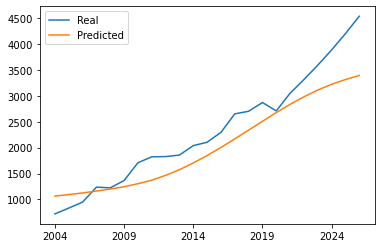

In [25]:
# Plot the real vs predicted prices as a line chart
GDP.plot()

## Germany LSTM GDP predictor

In [26]:
Germany_df = df[['Germany']]

Germany_gdp = Germany_df.drop(labels=["WEO Country Code", "ISO", "WEO Subject Code", "Subject Notes", "Country/Series-specific Notes"], axis=0)

Germany_gdp.rename(columns = {'Country':'Year'}, inplace = True)

#df = df.replace(",","", regex=True)
#df = df.astype("float")
#df


Germany_gdp = Germany_gdp.replace(",","", regex=True)
Germany_gdp = Germany_gdp.astype("float")
Germany_gdp

Country,Germany
1980,853.705
1981,718.264
1982,693.547
1983,691.912
1984,651.900
1985,661.037
1986,944.124
1987,1174.860
1988,1266.620
1989,1257.390


In [32]:
def window_data(Germany_gdp, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(Germany_gdp) - window):
        features = Germany_gdp.iloc[i : (i + window), feature_col_number]
        target = Germany_gdp.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [34]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 20

feature_column = 0
target_column = 0
X, y = window_data(Germany_gdp, window_size, feature_column, target_column)
print (f"X sample values:\n{X} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[ 853.705  718.264  693.547  691.912  651.9    661.037  944.124 1174.86
  1266.62  1257.39  1598.64  1875.62  2136.31  2072.46  2209.93  2588.
  2498.11  2214.69  2242.07  2197.13 ]
 [ 718.264  693.547  691.912  651.9    661.037  944.124 1174.86  1266.62
  1257.39  1598.64  1875.62  2136.31  2072.46  2209.93  2588.    2498.11
  2214.69  2242.07  2197.13  1948.84 ]
 [ 693.547  691.912  651.9    661.037  944.124 1174.86  1266.62  1257.39
  1598.64  1875.62  2136.31  2072.46  2209.93  2588.    2498.11  2214.69
  2242.07  2197.13  1948.84  1945.8  ]
 [ 691.912  651.9    661.037  944.124 1174.86  1266.62  1257.39  1598.64
  1875.62  2136.31  2072.46  2209.93  2588.    2498.11  2214.69  2242.07
  2197.13  1948.84  1945.8   2077.02 ]
 [ 651.9    661.037  944.124 1174.86  1266.62  1257.39  1598.64  1875.62
  2136.31  2072.46  2209.93  2588.    2498.11  2214.69  2242.07  2197.13
  1948.84  1945.8   2077.02  2501.01 ]
 [ 661.037  944.124 1174.86  1266.62  1257.39  1598.64  1875

In [35]:
type(X)



#XS = float(X)
#yS = float(y)


numpy.ndarray

In [36]:
# Use 90% of the data for training and the remainder for testing
split = int(0.9 * len(X))
X_train = X[: split]
X_test = X[split - 20:]
y_train = y[: split]
y_test = y[split - 20:]

In [37]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [38]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.0861325 ]
  [0.02392289]
  [0.01346514]
  [0.01293652]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00350589]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.09432262]
  [0.06271011]
  [0.13077232]
  [0.27057203]
  [0.20823656]
  [0.09562743]
  [0.09951263]
  [0.08007838]]

 [[0.02832485]
  [0.01501291]
  [0.01293652]
  [0.        ]
  [0.00295414]
  [0.09168444]
  [0.08227243]
  [0.03565157]
  [0.        ]
  [0.12961929]
  [0.1208749 ]
  [0.12940809]
  [0.06271011]
  [0.13077232]
  [0.317957  ]
  [0.23269953]
  [0.10137917]
  [0.1053648 ]
  [0.08441796]
  [0.0009686 ]]

 [[0.01777538]
  [0.01442352]
  [0.        ]
  [0.00295414]
  [0.09448067]
  [0.16641378]
  [0.11499086]
  [0.03206543]
  [0.12961929]
  [0.23482647]
  [0.2346408 ]
  [0.09771256]
  [0.13077232]
  [0.317957  ]
  [0.27345193]
  [0.11328887]
  [0.11170221]
  [0.08938244]
  [0.00102109]
  [0.        ]]

 [[0.01707754]
  [0.        ]
  [0.00295414]
  [0.09448067]
  [0.169081

In [39]:
y_train

array([[0.00091918],
       [0.        ],
       [0.03967587],
       [0.1678741 ],
       [0.26223203],
       [0.27292353],
       [0.3171953 ],
       [0.44754936],
       [0.54396335],
       [0.44197986],
       [0.44043177],
       [0.54511535],
       [0.47881353],
       [0.5406404 ],
       [0.58788135],
       [0.42697366],
       [0.46052671],
       [0.52474828],
       [0.61070057],
       [0.57924893],
       [0.5615487 ],
       [0.71765186],
       [0.8019593 ],
       [0.85019502]])

In [40]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.4

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))


model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer


model.add(Dense(1))

In [41]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ["accuracy"])

In [42]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 5)             140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 5)             220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [46]:
# Train the model
model.fit(X_train, y_train, epochs=200, shuffle=False, batch_size=10, verbose=1)

Epoch 1/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0098 - accuracy: 0.0417
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0204 - accuracy: 0.0417
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0245 - accuracy: 0.0417
Epoch 4/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0250 - accuracy: 0.0417
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.0417
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0325 - accuracy: 0.0417
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0234 - accuracy: 0.0417
Epoch 8/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0249 - accuracy: 0.0417
Epoch 9/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0207 - accuracy: 0.0417
Epoch 10/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0456 - accuracy: 0.0417
Epoch 11/200
3/3 [=

In [47]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.0137 - accuracy: 0.0435


[0.01371742319315672, 0.043478261679410934]

In [48]:
predicted = model.predict(X_test)
predicted


array([[0.23191723],
       [0.27054936],
       [0.31036744],
       [0.34556127],
       [0.37780386],
       [0.4107967 ],
       [0.4487559 ],
       [0.48196113],
       [0.51096267],
       [0.53441656],
       [0.559461  ],
       [0.5817671 ],
       [0.59661746],
       [0.61087835],
       [0.62658167],
       [0.64099145],
       [0.65525717],
       [0.67015797],
       [0.68417203],
       [0.6973355 ],
       [0.7073207 ],
       [0.71563494],
       [0.7248286 ]], dtype=float32)

In [49]:
X_test

array([[[0.        ],
        [0.0032937 ],
        [0.09448067],
        [0.1690813 ],
        [0.19874877],
        [0.19314307],
        [0.23337764],
        [0.27226669],
        [0.33384611],
        [0.30959354],
        [0.26676878],
        [0.35362972],
        [0.27345193],
        [0.13312902],
        [0.14668502],
        [0.10589048],
        [0.00114617],
        [0.        ],
        [0.04407482],
        [0.17690016]],

       [[0.00389977],
        [0.10534087],
        [0.1690813 ],
        [0.19874877],
        [0.19576456],
        [0.30366499],
        [0.33213908],
        [0.37355272],
        [0.30959354],
        [0.36180969],
        [0.43175966],
        [0.30900778],
        [0.13312902],
        [0.14668502],
        [0.12443496],
        [0.00128081],
        [0.        ],
        [0.04666679],
        [0.18648668],
        [0.27633143]],

       [[0.12472428],
        [0.18851655],
        [0.19874877],
        [0.19576456],
        [0.30609612],
      

In [50]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [51]:
predicted_prices.ravel().shape

(23,)

In [52]:
# Create a DataFrame of Real and Predicted values
GDP = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
GDP

,Real,Predicted
2004,2813.08,2712.819824
2005,2848.44,2840.587891
2006,2994.86,2972.278076
2007,3425.98,3088.674805
2008,3744.85,3195.310791
2009,3407.56,3304.427979
2010,3402.44,3429.970215
2011,3748.66,3539.790039
2012,3529.38,3635.706787
2013,3733.86,3713.275879


<AxesSubplot:>

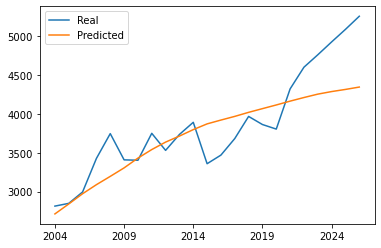

In [53]:
# Plot the real vs predicted prices as a line chart
GDP.plot()